In [284]:
!pip install scikit-image

In [220]:
import random
import numpy as np
import datasets as ds
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import os

In [2]:
dataset = ds.load_dataset(
    path="shunk031/COCOA", 
    name="COCO", 
    data_dir="./annotations.tar.gz"
)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Load images:   0%|          | 0/2500 [00:00<?, ?it/s]

Load COCOA annotations:   0%|          | 0/2500 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Load images:   0%|          | 0/1323 [00:00<?, ?it/s]

Load COCOA annotations:   0%|          | 0/1323 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Load images:   0%|          | 0/1250 [00:00<?, ?it/s]

Load COCOA annotations:   0%|          | 0/1250 [00:00<?, ?it/s]

In [17]:
tng_data = dataset['train']

In [326]:
idx = random.choice(range(tng_data.num_rows))
data = tng_data[idx]
data

{'image_id': 374180,
 'license_id': 6,
 'file_name': 'COCO_train2014_000000374180.jpg',
 'height': 503,
 'width': 640,
 'date_captured': '2013-11-19 19:19:03',
 'flickr_url': 'http://farm4.staticflickr.com/3258/2591075023_937ea922db_z.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x503>,
 'coco_url': 'http://mscoco.org/images/374180',
 'annotations': {'author': ['upwork_2'],
  'url': ['https://s3-us-west-1.amazonaws.com/coco-ann/coco-train/COCO_train2014_000000374180.jpg'],
  'regions': [{'segmentation': [<PIL.PngImagePlugin.PngImageFile image mode=L size=640x503>,
     <PIL.PngImagePlugin.PngImageFile image mode=L size=640x503>,
     <PIL.PngImagePlugin.PngImageFile image mode=L size=640x503>,
     <PIL.PngImagePlugin.PngImageFile image mode=L size=640x503>],
    'name': ['Chiken Nuggets', 'Orange', 'Orange', 'Plate'],
    'area': [202632.0, 29699.0, 11815.0, 260709.0],
    'is_stuff': [True, False, False, False],
    'occlude_rate': [0.0,
     0.96238929033

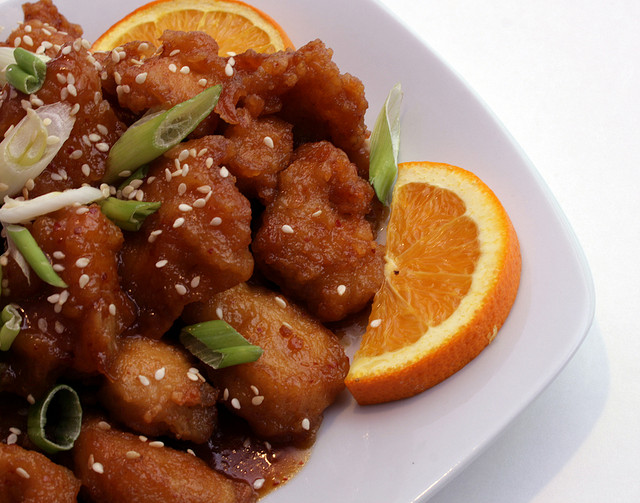

In [327]:
image = data['image']
image

[[0.000e+00 2.855e+02]
 [5.000e-01 2.860e+02]
 [5.000e-01 2.870e+02]
 ...
 [5.010e+02 4.255e+02]
 [5.015e+02 4.250e+02]
 [5.020e+02 4.245e+02]]

[[ 73.5 274. ]
 [ 73.5 273. ]
 [ 73.5 272. ]
 ...
 [ 72.5 275. ]
 [ 73.  274.5]
 [ 73.5 274. ]]

[[407.5 361. ]
 [407.5 360. ]
 [407.5 359. ]
 ...
 [406.5 362. ]
 [407.  361.5]
 [407.5 361. ]]
[[381.5 342. ]
 [381.  341.5]
 [380.5 342. ]
 [381.  342.5]
 [381.5 342. ]]

[[ 41.5   0. ]
 [ 41.    0.5]
 [ 40.5   1. ]
 [ 40.5   2. ]
 [ 40.5   3. ]
 [ 40.5   4. ]
 [ 40.5   5. ]
 [ 40.5   6. ]
 [ 40.5   7. ]
 [ 40.5   8. ]
 [ 40.    8.5]
 [ 39.5   9. ]
 [ 39.    9.5]
 [ 38.5  10. ]
 [ 38.   10.5]
 [ 37.5  11. ]
 [ 37.   11.5]
 [ 36.5  12. ]
 [ 36.   12.5]
 [ 35.5  13. ]
 [ 35.   13.5]
 [ 34.5  14. ]
 [ 34.   14.5]
 [ 33.5  15. ]
 [ 33.   15.5]
 [ 32.5  16. ]
 [ 32.   16.5]
 [ 31.   16.5]
 [ 30.5  17. ]
 [ 30.   17.5]
 [ 29.5  18. ]
 [ 29.   18.5]
 [ 28.5  19. ]
 [ 28.   19.5]
 [ 27.   19.5]
 [ 26.5  20. ]
 [ 26.   20.5]
 [ 25.5  21. ]
 [ 25.   21.5]


AttributeError: 'list' object has no attribute 'reshape'

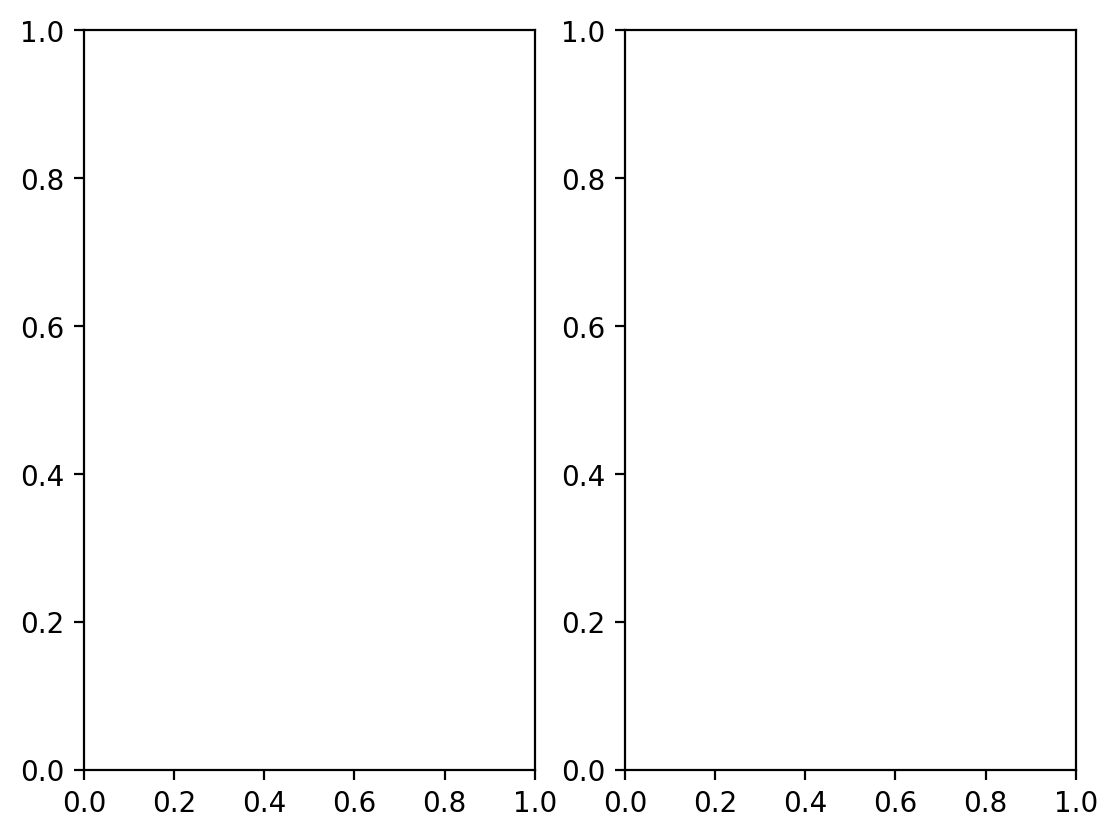

In [377]:
from PIL.Image import Image as PilImage

def segmentation_map_to_polygon(seg_map: PilImage) -> List[np.array]:
    seg_map_arr = np.array(seg_map)
    binary_mask = (seg_map_arr / 255).astype(np.uint8)
    
    contours = find_contours(binary_mask, level=0.5)

    polygons = []
    for contour in contours:
        print(contour)
        contour = np.flip(contour, axis=1)
        polygon = contour.ravel()
        polygons.append(polygon)
        
    print()        
    return polygons

def segmentation_maps_to_polygons(seg_maps: List[PilImage]) -> List[List[np.ndarray]]:
    return [segmentation_map_to_polygon(seg_map) for seg_map in seg_maps]

all_seg_maps = [reversed(region['segmentation']) for region in regions]
all_polygons = [segmentation_maps_to_polygons(seg_maps) for seg_maps in all_seg_maps]


fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200)
# for ax in axes:
#     ax.imshow(image)
#     ax.axis('off')

colors = []
plt_polygons = []

for polygons in all_polygons:
    for polygon in polygons:

        color = np.random.random((3, ))
        colors.append(color)

        poly = polygon.reshape(len(polygon) // 2, 2)

AttributeError: 'list' object has no attribute 'reshape'

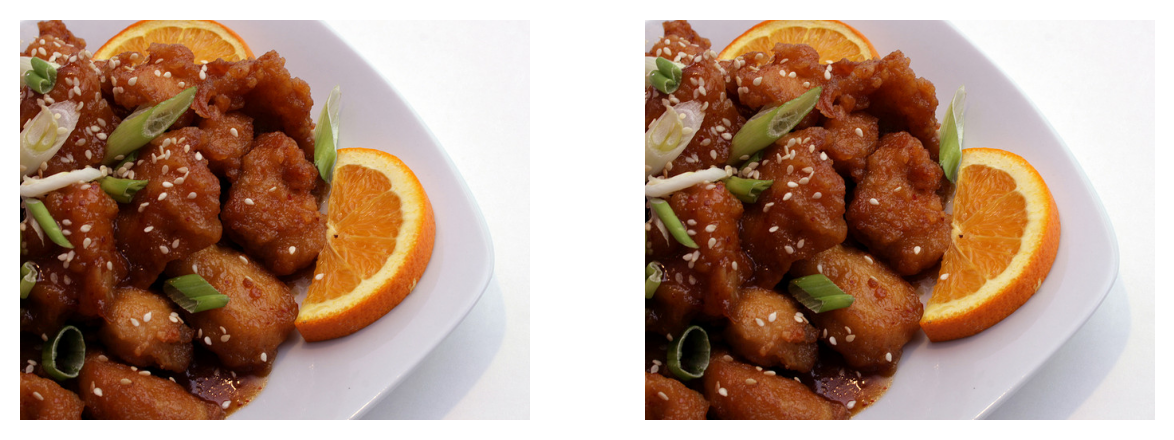

In [347]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200)
fig.tight_layout()

for ax in axes:
    ax.imshow(image)
    ax.axis('off')

colors = []
plt_polygons = []

for polygons in all_polygons:
    for polygon in polygons:
        color = np.random.random((3, ))
        colors.append(color)

        poly = polygon.reshape(len(polygon) // 2, 2)
        plt_polygons.append(Polygon(poly, closed=True, alpha=0.2))
    
    p = PatchCollection(
        plt_polygons, facecolors=colors, edgecolors=(0, 0, 0, 1), linewidths=2, alpha=0.7
    )
    axes[1].add_collection(p)